/tmp/ipykernel_24/3010336523.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df[i] = float(r_df[i][0:5])
/tmp/ipykernel_24/3010336523.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_df[i] = float(l_df[i][0:5])
/tmp/ipykernel_24/3010336523.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_df[i] = 10**(l_df[i])
/tmp/ipykernel_24/3010336523.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

List of unique temperatures (Kelvin) [38000. 36000. 35000. 34000. 37000. 32000. 31000. 30000. 29000. 26000.
 22000. 28000. 24000. 19000. 21000. 18000. 17000.  5000. 15000.  6000.
 14000.  7000. 11000. 12000. 10000.  8000.  9000.  4000.  3000.]
Input Temperature (K):10000
(array([ 14.43085394, -28.93410779,  33.73386916]), array([[   4.68960205,  -30.70498416,   43.59575555],
       [ -30.70498416,  204.28986832, -293.57402311],
       [  43.59575555, -293.57402311,  428.31021688]]))
Chi square value is 99016.97315813325


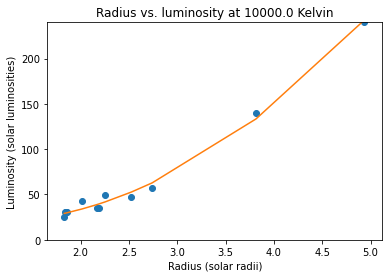

In [78]:
#Manthan 

import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy 
import scipy.optimize as fitter
from scipy.stats import chi2_contingency 
pd.read_csv('dataframe (1).csv')
#!/usr/bin/env python
# coding: utf-8

# In[6]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Location = r'dataframe (1).csv'
d = pd.read_csv(Location)
df = pd.DataFrame(d)
df.drop(df.columns[[10, 11,20]], axis=1,inplace=True)
df

radius_df = df[['System', 'Radius (Rsun)', 'log (L/Lsun)', 'log Teff (K)']]
radius_df = radius_df.dropna(axis='rows')
radius_df = radius_df.reset_index()


r_df = radius_df['Radius (Rsun)']
j = 0

l_df = radius_df['log (L/Lsun)']
r_uncertainty_list = []
l_uncertainty_list = []

t_df = radius_df['log Teff (K)']

for i in range (0, len(r_df)):
    j = 6
    k = 6
    l = 6
    while j <= len(r_df[i]):
        if (r_df[i][j] == ' ') or (r_df[i][j] == '±'): 
            j = j+1
        else:
            r_uncertainty_list.append(r_df[i][j:-1])
            break
    while k <= len(l_df[i]):
        if (l_df[i][j] == ' ') or (l_df[i][j] == '±'): 
            j = j+1
        else:
            l_uncertainty_list.append(l_df[i][j:-1])
            break
    r_df[i] = float(r_df[i][0:5])
    l_df[i] = float(l_df[i][0:5])
    l_df[i] = 10**(l_df[i])
    t_df[i] = float(t_df[i][0:5])
    t_df[i] = 10**(t_df[i])

r_uncertainty_list2 = []

tlist = t_df.values.tolist()


for i in range (0, len(r_uncertainty_list)):
    r_uncertainty_list2.append(float(r_uncertainty_list[i]))
for j in range (0, len(l_uncertainty_list)):
    l_uncertainty_list[j] = float(l_uncertainty_list[j])
    l_uncertainty_list[j] = 10**l_uncertainty_list[j]
r_list = r_df.values.tolist()
l_list = l_df.values.tolist()


for i in range (0, len(tlist)):
    tlist[i] = round(tlist[i], -3)

revised_radius_df = pd.DataFrame(r_list, columns = ['radius (rsun)'])
revised_radius_df.reset_index()
revised_radius_df['luminosity (lsun)'] = l_list
revised_radius_df['temperature (kelvin)'] = tlist
revised_radius_df['radius uncertainty (rsun)'] = r_uncertainty_list2
revised_radius_df['luminosity uncertainty (lsun)'] = l_uncertainty_list

unique_temp_list = pd.unique(revised_radius_df['temperature (kelvin)'])
print('List of unique temperatures (Kelvin)', unique_temp_list)
revised_radius_df

tinput = float(input("Input Temperature (K):"))
for i in unique_temp_list:
    if i == tinput:
        temp_bool = revised_radius_df['temperature (kelvin)'] == i
        temp_df_row = revised_radius_df[temp_bool]
        temp_df_row = temp_df_row.reset_index()
temp_df_store = pd.DataFrame(temp_df_row)

temp_df_store = temp_df_store.sort_values(['radius (rsun)'])

column = temp_df_store['radius (rsun)']
max_value = column.max()


x_list = temp_df_store['radius (rsun)']
y_list = temp_df_store['luminosity (lsun)']

x_err = temp_df_store['radius uncertainty (rsun)']
y_err = temp_df_store['luminosity uncertainty (lsun)']
plt.scatter(x_list, y_list)
plt.errorbar(x_list, y_list, xerr = x_err, yerr = y_err, ls = 'none')
plt.ylim([0, y_list.max()])
plt.xlabel('Radius (solar radii)')
plt.ylabel('Luminosity (solar luminosities)')
plt.title('Radius vs. luminosity at '+str(tinput)+' Kelvin')
x_range = np.linspace(0, max_value)
def quadratic (x, a, b, c):
    return(a*x**2+b*x+c)
fit_params = fitter.curve_fit(quadratic, x_list, y_list)

a_fit = fit_params[0][0]
b_fit = fit_params[0][1]
c_fit = fit_params[0][2]
fit = []
for i in x_list:
    fit.append(quadratic(i, a_fit, b_fit, c_fit))
print(fit_params)
plt.plot(x_list, fit)

chi_square_list = []
expected_list = []
for i in x_list:
    expected_list.append(a_fit*i**2+b_fit*i+c_fit)
for i in range (0, len(y_list)):
    c = ((y_list[i]-expected_list[i])/y_err[i])**2
    chi_square_list.append(c)
print('Chi square value is', sum(chi_square_list))